In [1]:
'''
Read reviews from a JSON-formatted file into an array.
'''
import json
import string
import re
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score
# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

lines = [];
num_pos = 0;
num_neg = 0;
num_total = 75000;

#with open('/Users/edgarleung/Downloads/yelp_dataset/yelp_academic_dataset_review.json', 'r',encoding='utf8') as f:
with open('data/yelp_academic_dataset_review.json', 'r',encoding='utf8') as f:
    for line in f:
        if (len(lines) >= (num_total * 2)):
            break;

        json_info = json.loads(line);

        if json_info['stars'] > 3:
            if num_pos > num_total:
                continue;
            num_pos = num_pos + 1;
        elif json_info['stars'] < 3:
            if num_neg > num_total:
                continue;
            num_neg = num_neg + 1;
        else:
            continue;

        lines.append(json.loads(line));

'''
Separate line data into reviews and labels
'''
reviews = [line['text'] for line in lines];

stars = [line['stars'] for line in lines];
labels = ['1' if star > 3 else '0' for star in stars];

'''
Clean each document by removing unnecesary characters and splitting by space.
'''

Using TensorFlow backend.


'\nClean each document by removing unnecesary characters and splitting by space.\n'

In [2]:
print(reviews[0])
print(stars[0])
print(labels[0])

The pizza was okay. Not the best I've had. I prefer Biaggio's on Flamingo / Fort Apache. The chef there can make a MUCH better NY style pizza. The pizzeria @ Cosmo was over priced for the quality and lack of personality in the food. Biaggio's is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say...
2
0


In [3]:
def clean_document1(doco):
    punctuation = string.punctuation + '\n\n';
    punc_replace = ''.join([' ' for s in punctuation]);
    doco_clean = doco.replace('-', ' ');
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace);
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')]);
    doco_clean = doco_clean.split(' ');
    doco_clean = [word.lower() for word in doco_clean if len(word) > 0];

    return doco_clean;


In [4]:
# Generate a cleaned reviews array from original review texts
review_cleans = [clean_document1(doc) for doc in reviews];
' '.join(review_cleans[0])

'the pizza was okay not the best i ve had i prefer biaggio s on flamingo fort apache the chef there can make a much better ny style pizza the pizzeria cosmo was over priced for the quality and lack of personality in the food biaggio s is a much better pick if youre going for italian family owned home made recipes people that actually care if you like their food you dont get that at a pizzeria in a casino i dont care what you say'

In [5]:
stopwords = {'a',
 'ain',
 'am',
 'an',
 'and',
 'any', 
 'as',
 'at',
 'be',
 'been',
 'being',
 'by',
 'd',
 'during',
 'each',
 'for',
 'from',
 'further',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'my',
 'myself',
 'now',
 'o',
 'of',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'she',
 "she's",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 've',
 'we',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

def clean_document2(doco):
    ## Remove stop words
    doco = [w for w in doco if not w in stopwords]
    
    stemmer = SnowballStemmer('english')
    doco = [stemmer.stem(word) for word in doco]

    return doco

In [6]:
review_cleans2 = [clean_document2(doc) for doc in review_cleans];
review_cleans = review_cleans2
' '.join(review_cleans[0])

'pizza was okay not best had prefer biaggio flamingo fort apache chef can make much better ny style pizza pizzeria cosmo was priced quality lack personality food biaggio is much better pick youre going italian family owned home made recipes people actually care like food dont get pizzeria casino dont care say'

In [7]:
sentences = [' '.join(r) for r in review_cleans]
sentences[0]

'pizza was okay not best had prefer biaggio flamingo fort apache chef can make much better ny style pizza pizzeria cosmo was priced quality lack personality food biaggio is much better pick youre going italian family owned home made recipes people actually care like food dont get pizzeria casino dont care say'

In [8]:
# Use a Keras Tokenizer and fit on the sentences
tokenizer = Tokenizer();
tokenizer.fit_on_texts(sentences);
reviews_encoded = np.array(tokenizer.texts_to_sequences(sentences));
' '.join(map(str,reviews_encoded[0]))

'116 1 461 4 53 7 1484 20912 4351 6184 7241 584 27 65 67 73 2100 536 116 4651 5383 1 542 151 738 2447 10 20912 3 67 73 396 7518 60 683 209 1479 131 69 4668 55 216 165 21 10 849 20 4651 933 849 165 93'

In [9]:
sequence_dict = tokenizer.word_index;
# reverse - index to word
word_dict = dict((num, val) for (val, num) in sequence_dict.items());

In [10]:
#for i,(a,b) in enumerate(zip(reviews_encoded,text_sequences)):
#    if (a!=b):
#        print(review_cleans[i])

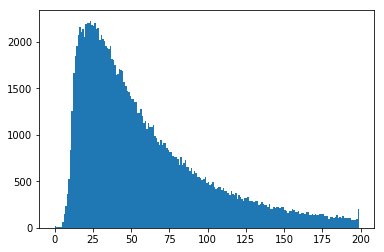

In [11]:
# Plot a Histogram of length of reviews
lengths = [len(x) for x in reviews_encoded];
plt.hist(lengths, bins=range(200))
plt.show()

In [12]:
# Truncate and Pad reviews at a Maximum cap of 60 words.
max_cap = 60;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

In [13]:
' '.join(list(map(lambda x: word_dict[x] if x>0 else '0', X[0])))

'0 0 0 0 0 0 0 0 pizza was okay not best had prefer biaggio flamingo fort apache chef can make much better ny style pizza pizzeria cosmo was priced quality lack personality food biaggio is much better pick youre going italian family owned home made recipes people actually care like food dont get pizzeria casino dont care say'

In [14]:
# Obtain a One-hot Y array for each review label.
Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])

Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [15]:
# Get a randomized sequence of positions to shuffle reviews
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

# Shuffle X and Y
X = X[random_posits];
Y = Y[random_posits];

In [16]:
# Divide the reviews into Training, Dev, and Test data.
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));

X_train, Y_train = X[:train_cap], Y[:train_cap];
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap];
X_test, Y_test = X[dev_cap:], Y[dev_cap:]


In [20]:
def initializeModel():
    model = Sequential();
    model.add(Embedding(len(word_dict)+1, max_cap, input_length=max_cap));
    model.add(LSTM(50, return_sequences=True, recurrent_dropout=0.6));
    model.add(Dropout(0.6))
    model.add(LSTM(50, recurrent_dropout=0.6));
    model.add(Dense(50, activation='relu'));
    model.add(Dense(2, activation='softmax'));
    return model

In [21]:
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [23]:
# Divide the reviews into Training, Dev, and Test data.
import math
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));

X_train, Y_train = X[:train_cap], Y[:train_cap];
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap];
X_test, Y_test = X[dev_cap:], Y[dev_cap:]

train_sizes = [math.floor(i * len(X_train)) for i in np.linspace(0.1, 1.0, 5)]
train_scores = []
test_scores = []
for ts in train_sizes:
    model = initializeModel()
    optimizer = Adam(lr=0.001, decay=0.0001);
    X_train_sub = X[:ts]
    Y_train_sub = Y[:ts]
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # fit model
    history = model.fit(X_train_sub, Y_train_sub, batch_size=128, epochs=3)
    # Obtain predictions
    predictions = model.predict_classes(X_dev)

    # Convert Y_test to the same format as predictions
    print("val acc:")
    actuals = [0 if y[0] == 1 else 1 for y in Y_dev];

    # Use SkLearn's Metrics module
    accuracy = (accuracy_score(predictions, actuals))
    test_scores = test_scores + [[accuracy]]
    train_scores = train_scores + [[history.history['acc'][len(history.history['acc'])-1]]]

Epoch 1/3
12750/12750 [==============================] - 23s 2ms/step - loss: 0.4621 - acc: 0.7869
Epoch 2/3
12750/12750 [==============================] - 21s 2ms/step - loss: 0.2089 - acc: 0.9237
Epoch 3/3
12750/12750 [==============================] - 20s 2ms/step - loss: 0.1312 - acc: 0.9549
val acc:
Epoch 1/3
41437/41437 [==============================] - 70s 2ms/step - loss: 0.3377 - acc: 0.8496
Epoch 2/3
41437/41437 [==============================] - 68s 2ms/step - loss: 0.1838 - acc: 0.9333
Epoch 3/3
41437/41437 [==============================] - 68s 2ms/step - loss: 0.1336 - acc: 0.9541
val acc:
Epoch 1/3
70125/70125 [==============================] - 119s 2ms/step - loss: 0.2993 - acc: 0.8760
Epoch 2/3
70125/70125 [==============================] - 116s 2ms/step - loss: 0.1720 - acc: 0.9377
Epoch 3/3
70125/70125 [==============================] - 116s 2ms/step - loss: 0.1285 - acc: 0.9547
val acc:
Epoch 1/3
98812/98812 [==============================] - 167s 2ms/step - loss: 

In [24]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(title, train_sizes,train_scores,test_scores, ylim=(0.80, 1.01)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt





Separate line data into reviews and labels



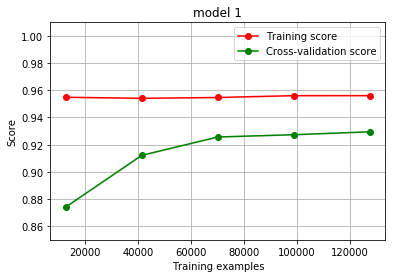

In [29]:
test_scores_2 = [[s] for s in train_scores]
train_scores_2 = [[s] for s in test_scores]
plot_learning_curve("model 1", train_sizes,train_scores_2,test_scores_2, ylim=(0.85, 1.01))
plt.show()

In [31]:
test_scores
# messed up, should be train score

[0.9549019608030133,
 0.9541231266325135,
 0.9547237076708339,
 0.956068088888847,
 0.9560941176489288]

In [30]:
train_scores
# messed up, should be test score

[0.8740833333333333,
 0.9121666666666667,
 0.9256666666666666,
 0.9273333333333333,
 0.9295]